<a href="https://colab.research.google.com/github/Shitrasburg/map/blob/main/%E8%B7%AF%E4%B8%8D%E5%B9%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 2 路不平偵測

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from google.colab import drive
import os
import shutil
drive.mount('/content/drive/')

Mounted at /content/drive/


In [39]:
%cd /content/drive/

%pwd

/content/drive


'/content/drive'



# 讀CSV檔案

In [35]:
DATA_DIR = '/content/drive/MyDrive/mapLab2/Data'
RESULT_DIR = '/content/drive/MyDrive/mapLab2/Result'
MAP_PATH = '/content/drive/MyDrive/mapLab2/map.jpg'

############### 可調參數區 ###############

z_threshold_para = 1.5

############### 可調參數區 ###############
# 計算垂直分量
def calculateVertical(data):

    g_x = data['Accelerometer_x'].dropna()
    g_y = data['Accelerometer_y'].dropna()
    g_z = data['Accelerometer_z'].dropna()

    g0_x = g_x.mean()
    g0_y = g_y.mean()
    g0_z = g_z.mean()


    verticalValue = ((g_x * g0_x) + (g_y * g0_y) + (g_z * g0_z)) / np.sqrt((g_x * g_x) + (g_y * g_y) + (g_z * g_z))

    data['Amptitude'] = verticalValue- 1.0
    # g0=3*np.mean([data['Accelerometer_z'].dropna(),data['Accelerometer_x'].dropna(),data['Accelerometer_y'].dropna()])
    # data["Amptitude"]=(np.dot(g0,data['Accelerometer_z'])+np.dot(g0,data['Accelerometer_x'])+np.dot(g0,data['Accelerometer_y']))/abs(g0)
    # r["Amptitude2"]=(g0*r['Accelerometer_z']+g0*r['Accelerometer_x']+g0*r['Accelerometer_y'])/abs(g0)
    return data
def convertCsvType(data):
    data['Timestamp'] = pd.to_numeric(data['Timestamp'], errors='coerce')#coerce 不能轉的為NAN
    data['Gyroscope_x'] = pd.to_numeric(data['Gyroscope_x'], errors='coerce')
    data['Gyroscope_y'] = pd.to_numeric(data['Gyroscope_y'], errors='coerce')
    data['Gyroscope_z'] = pd.to_numeric(data['Gyroscope_z'], errors='coerce')
    data['Accelerometer_x'] = pd.to_numeric(data['Accelerometer_x'], errors='coerce')
    data['Accelerometer_y'] = pd.to_numeric(data['Accelerometer_y'], errors='coerce')
    data['Accelerometer_z'] = pd.to_numeric(data['Accelerometer_z'], errors='coerce')
    data['Magnetometer_x'] = pd.to_numeric(data['Magnetometer_x'], errors='coerce')
    data['Magnetometer_y'] = pd.to_numeric(data['Magnetometer_y'], errors='coerce')
    data['Magnetometer_z'] = pd.to_numeric(data['Magnetometer_z'], errors='coerce')
    data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
    data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
    data['Altitude'] = pd.to_numeric(data['Altitude'], errors='coerce')
    data['Speed'] = pd.to_numeric(data['Speed'], errors='coerce')
    return data

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

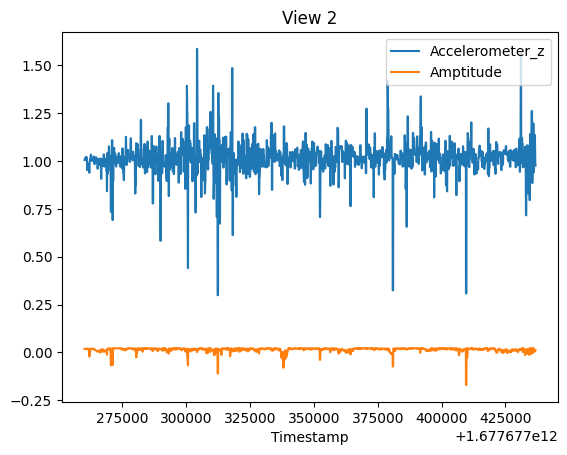

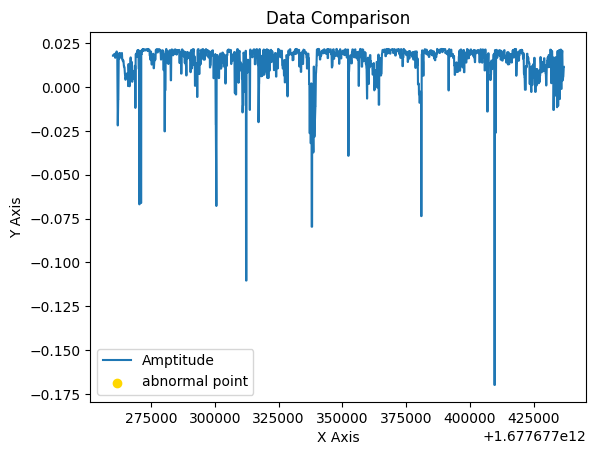

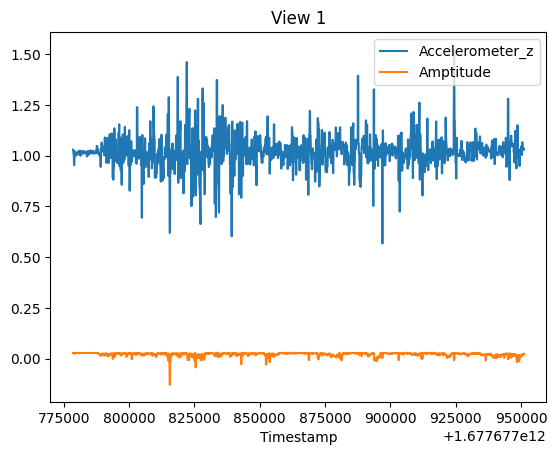

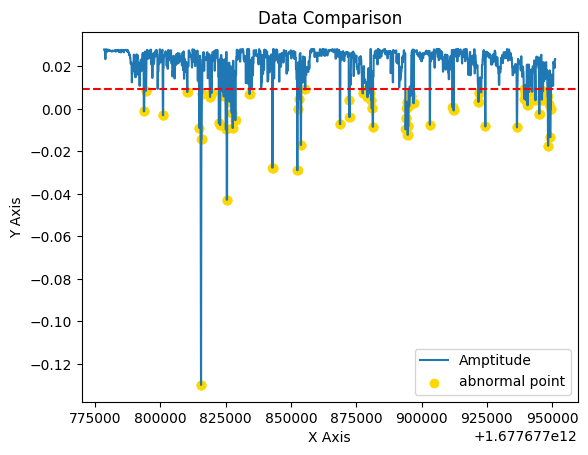

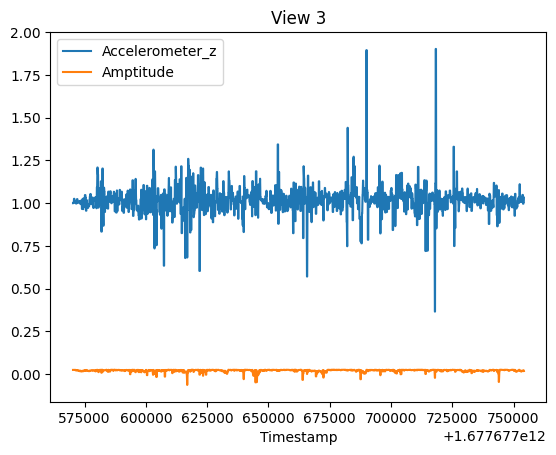

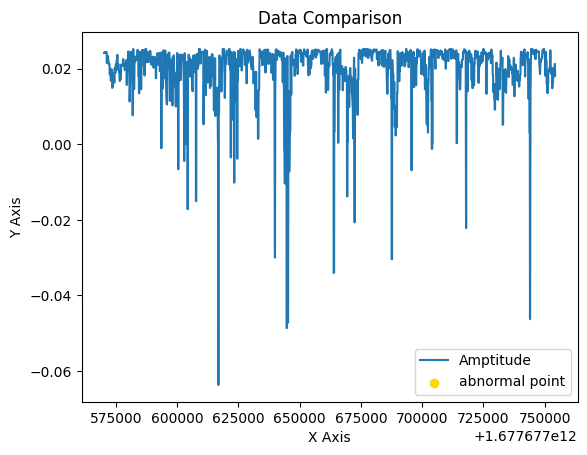

In [46]:
import re

def read_csv(path, savePath):
    # print("save path {}".format(savePath))
    csv_data = pd.read_csv(path)
    csv_data = convertCsvType(csv_data)
    csv_data = csv_data.ffill()
    csv_data = calculateVertical(csv_data)#
    return csv_data
def plot(csv_data,savePath,index):
    # gPlot = csv_data.plot(x='Timestamp', y=['Gyroscope_x','Gyroscope_y','Gyroscope_z'])
    # gPlot.get_figure().savefig(savePath + "/"+str(index)+"g_observer.png")

    # aPlot = csv_data.plot(x='Timestamp', y=['Accelerometer_x','Accelerometer_y','Accelerometer_z'])
    # aPlot.get_figure().savefig(savePath + "/"+str(index)+"a_observer.png")

    vPlot = csv_data.plot(x='Timestamp', y=['Accelerometer_z', 'Amptitude'])
    name="View "+index 
    vPlot.set_title(name)
    vPlot.get_figure().savefig(savePath + "/"+str(index)+"v_observer.png")
def z_threshold(data,limit):
  limit=1.2
  mean = np.mean(data)
  std = np.std(data)
  print("std: {}".format(std))
  print("mean: {}".format(mean))
  upperLimit=mean+limit*std
  lowerLimit=mean-limit*std
  return lowerLimit
def STD(data,mul):
  # data=data.dropna(axis=0,subset=['Amptitude'])
  # print(data)
  t0=data.loc[0,"Timestamp"]
  index=-1 #index
  index0=0
  ti=[]#符合條件index的list
  slope=[]#符合條件index的list
  stdPer5sec=[]
  amppertime=[]
  count=0
  for t in (data["Timestamp"]):
    t1=t-t0
    index=index+1
    if t1<500:
      count=count+1
      continue
    x0=data.iloc[index0]["Amptitude"]
    x=data.iloc[index]["Amptitude"]
    for i in range(index0,index+1):
      amppertime.append(data.iloc[i]["Amptitude"])
    std=0
    std = np.std(amppertime)
    stdPer5sec.append(std)
    index0=index0+count
    index0=index
    t0=t
    count=0
  print(thresh)
  return np.mean(stdPer5sec)
def analysis(r, savePath):
    thresh = z_threshold(r['Amptitude'], z_threshold_para)
    # thresh=STD(csvData,2)
    #Latitude(緯度),Longitude(經度)
    df_r1 = r.loc[r['Amptitude'].abs() > thresh, ['Latitude','Longitude']]
    df_r1 = df_r1.dropna(axis=0, how='any')
    #print(r.loc[r['Amptitude'].abs()>thresh,['Latitude','Longitude']])
    df_r1.to_csv(savePath + '/result.txt', sep=',', index=False, header=False)

    #紀錄異常點分級
    df_level = r.loc[r['Amptitude'].abs()>thresh,['Latitude','Longitude','Amptitude']]
    df_level=df_level.dropna(axis=0,how='any')
    df_level = df_level.assign(Level='')
    df_level.loc[df_level['Amptitude'].abs() >= thresh, 'Level'] = 0
    df_level.loc[df_level['Amptitude'].abs() > thresh*2, 'Level'] = 1
    df_level = df_level.loc[r['Amptitude'].abs()>thresh,['Latitude','Longitude','Level']]
    df_level.to_csv(savePath + '/level.txt', sep=',', index=False, header=False)

    #########
    #畫出異常點與時間關係
    r['verify'] = np.where(
    r["Amptitude"]>1,
   np.where(
    r["Amptitude"]>thresh,1,0)
   ,np.where(
    r["Amptitude"]<thresh,1,0)
    )
    df_abnormal=r.loc[r['verify']==1,['Timestamp','Amptitude','Latitude','Longitude']]
    # df_abnormal = r.loc[r['Amptitude'].abs()<abs(thresh),['Amptitude','Timestamp']]
    # print("df_abnormal {0}".format(r['Amptitude'].abs()))
    # print("df_abnormal {0}".format(r['Amptitude'].abs()>abs(thresh)))
    # print(df_abnormal.to_csv(savePath + '/tesat.txt', sep=',', index=False, header=False))
    # print("threshold: {}".format(thresh))

    # 創建一個圖表和一個軸
    fig, ax = plt.subplots()

    # 畫第一個 DataFrame 的資料
    ax.plot(r['Timestamp'], r['Amptitude'], label='Amptitude')

    # 畫第二個 DataFrame 的資料
    ax.scatter(df_abnormal['Timestamp'], df_abnormal['Amptitude'],color = '#FFD700', label='abnormal point')
    plt.axhline(y=(thresh),ls='--',c='red')
    # 設置圖表標題和軸標籤
    ax.set_title('Data Comparison')
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')

    # 添加圖例
    ax.legend()
    # print("savePath: {}".format(savePath))
    datasetName=re.findall('/(?P<digit>\d+)', savePath)
    print("threshold->{0}:{1}".format(datasetName,thresh))
    # 顯示圖表
    # plt.savefig(savePath + '/hole.png')

    # showToMap(savePath + '/level.txt', savePath)

    # showToMap(savePath + '/level.txt', savePath)    
#讀資料夾下檔案們
# print(DATA_DIR)
for fileName in os.listdir(DATA_DIR):
  if '.ipynb_checkpoints' not in fileName:
    csvPath = DATA_DIR + '/' + fileName         
    index = fileName.replace(".csv", "")
    # print("index {}".format(index))
    saveDir = RESULT_DIR + '/' + index
    # print("saveDir {}".format(saveDir))
    csvData = read_csv(csvPath, saveDir)
    # print("csvData {0},index:{1}".format(saveDir,index))
    plot(csvData,saveDir,index)
    analysis(csvData, saveDir)
    # stdPer5sec=STD(csvData)
    # print(np.mean(stdPer5sec))


In [26]:
df1=pd.DataFrame({"col1":[True,False,False,True,False],
              "col2":[False,True,False,True,False],
               "col3":[Null,True,True,True,False],
               "Cnt" :[1,2,3,4,5]})
df1[df1[["col1","col2"]].all(axis=1)]

['3']


In [ ]:

from sklearn.cluster import KMeans
def calculate_cluster(resultTxtPath):
  colnames=['x', 'y'] 
  blobs = pd.read_csv('files.txt', names=colnames, header=None)
  KM=KMeans(n_clusters=12,init='random',random_state=10)
  KM.fit(blobs)
  labels=KM.predict(blobs)

  #plt.scatter(x=blobs['x'], y=blobs['y'], s=150,c=KM.predict(blobs))
  centroids=KM.cluster_centers_#查看各群集的中心點
  centroid_labels = [centroids[i] for i in labels]


  # 將分組資料 (分類標籤) 併入原資料
  lb = pd.DataFrame(labels, columns=['labels'])
  df = pd.concat((lb, blobs), axis=1)
  #print(df)
  wcss=[]
  for i in range(1,15):
    kmeans = KMeans(i,init='random',random_state=10)
    kmeans.fit(blobs)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

  number_clusters = range(1,15)
  plt.plot(number_clusters,wcss)
  plt.title('The Elbow title')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  DF = pd.DataFrame(centroids)
  DF.to_csv(r'/content/cluster.txt',sep=',',index=False,header=0)
def merge_data(resultPath):
  all_data = pd.DataFrame()
  for fileName in os.listdir(groupReultDir):
      if '.ipynb_checkpoints' not in fileName:
        groupReultDir = RESULT_DIR + fileName
        pointReusltPath = groupReultDir + '/' + index + '/result.txt'
        print(pointReusltPath)
        data = pd.read_csv(pointReusltPath, sep=",",header =None, names=["Latitude", "Longitude"])
        all_data = pd.concat([all_data, data])
  resultTxtPath = groupReultDir + '/' +  + 'files.txt'
  all_data.to_csv(resultTxtPath, sep=',', index=False, header=False)
  print(all_data)
  return resultTxtPath

2. 觀察輸入資料

- ![](https://docs-assets.developer.apple.com/published/96e9d46b41/c9b606b2-9a52-487e-8385-e710ffa1ce5f.png)


<Axes: xlabel='Timestamp'>

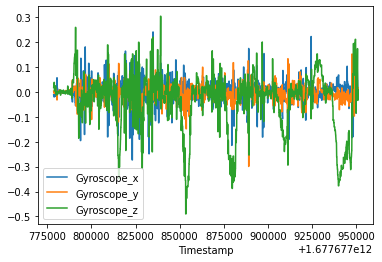

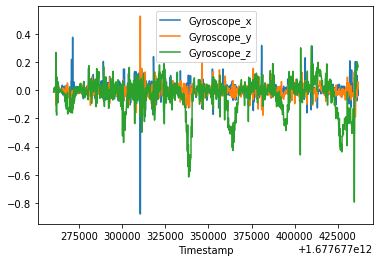

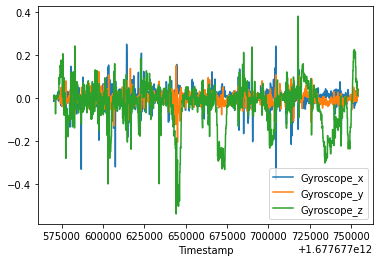

In [ ]:
# 陀螺儀
r.plot(x='Timestamp', y=['Gyroscope_x','Gyroscope_y','Gyroscope_z'])
r2.plot(x='Timestamp', y=['Gyroscope_x','Gyroscope_y','Gyroscope_z'])
r3.plot(x='Timestamp', y=['Gyroscope_x','Gyroscope_y','Gyroscope_z'])

<Axes: xlabel='Timestamp'>

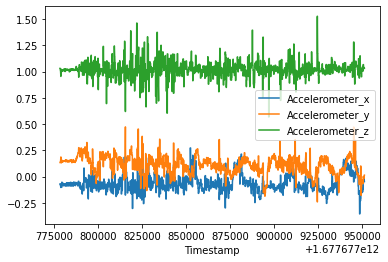

In [ ]:
# 加速度感測器
r.plot(x='Timestamp', y=['Accelerometer_x','Accelerometer_y','Accelerometer_z'])

<Axes: xlabel='Timestamp'>

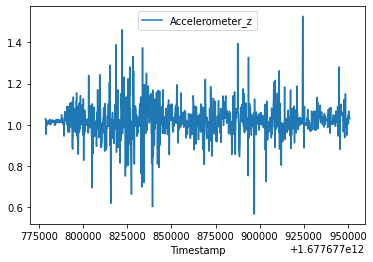

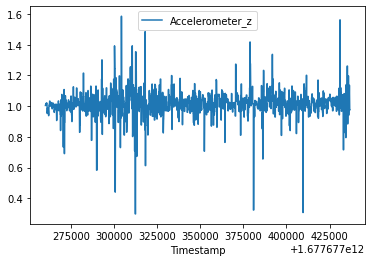

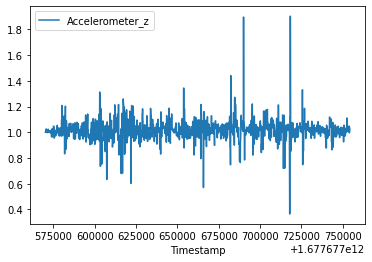

In [ ]:
r.plot(x='Timestamp', y=['Accelerometer_z'])
r2.plot(x='Timestamp', y=['Accelerometer_z'])
r3.plot(x='Timestamp', y=['Accelerometer_z'])


##Task1-計算震幅並畫出
- ![](https://i.imgur.com/JeZeFcu.png)

In [ ]:
######### Please Write Your Code Here #########
# Calculate Amptitude
import numpy as np
# r.drop(index=0,inplace=True)
# r2.drop(index=0,inplace=True)
# r3.drop(index=0,inplace=True)
g0=3*np.mean([r['Accelerometer_z'],r['Accelerometer_x'],r['Accelerometer_y']])
#g1=r['Accelerometer_z'].mean()+r['Accelerometer_x'].mean()+r['Accelerometer_y'].mean()

g20=3*np.mean([r2['Accelerometer_z'],r2['Accelerometer_x'],r2['Accelerometer_y']])
g30=3*np.mean([r3['Accelerometer_z'],r3['Accelerometer_x'],r3['Accelerometer_y']])
r["Amptitude"]=(np.dot(g0,r['Accelerometer_z'])+np.dot(g0,r['Accelerometer_x'])+np.dot(g0,r['Accelerometer_y']))/abs(g0)
# r["Amptitude2"]=(g0*r['Accelerometer_z']+g0*r['Accelerometer_x']+g0*r['Accelerometer_y'])/abs(g0)
r2["Amptitude"]=(np.dot(g20,r2['Accelerometer_z'])+np.dot(g20,r2['Accelerometer_x'])+np.dot(g20,r2['Accelerometer_y']))/abs(g20)
r3["Amptitude"]=(np.dot(g30,r3['Accelerometer_z'])+np.dot(g30,r3['Accelerometer_x'])+np.dot(g30,r3['Accelerometer_y']))/abs(g30)
# Calculate Average Amptitude
average_amp = np.mean(r["Amptitude"]) #Change this

print(g0)
print(g20)
print(g30)
#########

1.0703029685617889
1.0672729690672857
1.0611325355129126


<Axes: xlabel='Timestamp'>

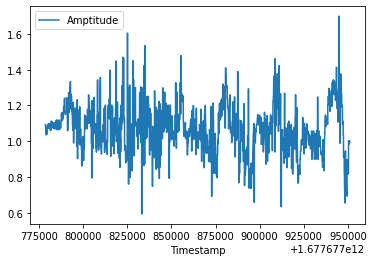

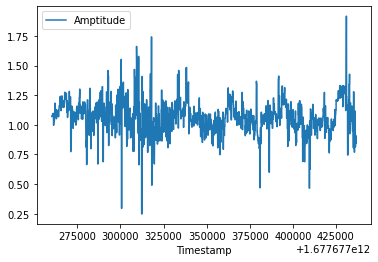

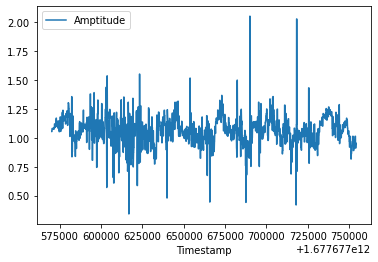

In [ ]:
# Plot Amptitude Graph
r.plot(x='Timestamp', y=['Amptitude'])
r2.plot(x='Timestamp', y=['Amptitude'])
r3.plot(x='Timestamp', y=['Amptitude'])

##Task2-挑出異常震動點

In [ ]:
#z-diff Ampitude..2 every 0.5 sec
csvpath='/content/z_diff.txt'
t0=r.loc[1,"Timestamp"]
a=-1 #index
a0=0
ti=[]#符合條件index的list
slope=[]#符合條件index的list
pretime=[]
for t in (r["Timestamp"]):
  t1=t-t0
  a=a+1
  if t1<500:
    continue
  a0=a-1
  x0=r.iloc[a0]["Amptitude"]
  x=r.iloc[a]["Amptitude"]
  x1=x-x0
  if abs(x1)>0.2:
    ti.append(a)
    slope.append(x1)
    pretime.append(a0)
  a0=a
  t0=t
#print(ti)
#print(pretime)
z_diff_data=r.loc[ti,["Latitude","Longitude","Timestamp","Amptitude"]]
z_diff_pretime=r.loc[pretime,["Timestamp","Amptitude","Latitude","Longitude"]]
z_diff_data["slope"]=slope
z_diff_pretime=z_diff_pretime.rename_axis('index1').reset_index()
z_diff_data=z_diff_data.rename_axis('index1').reset_index()
df=pd.concat([z_diff_data, z_diff_pretime],ignore_index = True)
print(df)
df=df.sort_values(["index1"],ascending=True)
print(df)
df.to_csv(csvpath,sep=',',index=False,header=1)
# z_diff_pretime.rename(columns = {'Timestamp':'Timestamp_pre','Amptitude':'Amptitude_2','Latitude':'Latitude_2','Longitude':'Longitude_2'}, inplace = True)
# z_diff_pretime=z_diff_pretime.rename_axis('index2').reset_index()
# # print(z_diff_pretime)
# z_diff_data=z_diff_data.rename_axis('index1').reset_index()

# #z_diff_data.append(z_diff_pretime)
# #pd.concat([df, z_diff_pretime], ignore_index=True)
# test=pd.concat([z_diff_data, z_diff_pretime],  axis = 1, ignore_index = False)

# test.to_csv(csvpath,sep=',',index=False,header=1)

# r.loc[ti,["Latitude","Longitude","Timestamp","Amptitude"]].to_csv(csvpath,index=False,header=False,mode='a')


#z_diff_data.assign(TutorsAssigned=z_diff_pretime)
# print(z_diff_data)


    index1   Latitude   Longitude      Timestamp  Amptitude     slope
0      284  24.788136  120.998916  1677677796876   0.902588  0.273924
1      457  24.787833  120.998388  1677677807982   1.141845  0.200561
2      619  24.787562  120.997860  1677677818417   1.209593  0.239261
3      653  24.787567  120.997728  1677677820645   1.130127 -0.277344
4      739  24.787588  120.997228  1677677826199   0.934204  0.379395
5      783  24.787593  120.996983  1677677829006   0.917969  0.273193
6      826  24.787631  120.996841  1677677831792   1.065309  0.205688
7      870  24.787677  120.996612  1677677834604   1.424682 -0.552003
8      967  24.787762  120.996156  1677677840900   1.171021 -0.287964
9      977  24.787755  120.996078  1677677841500   1.189332 -0.215577
10    1479  24.789126  120.995354  1677677873852   1.106324 -0.286744
11    2053  24.789679  120.997473  1677677910870   1.159669  0.263793
12    2211  24.789116  120.998260  1677677920977   0.883667  0.304076
13    2393  24.78878

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 26012 (\N{CJK UNIFIED IDEOGRAPH-659C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


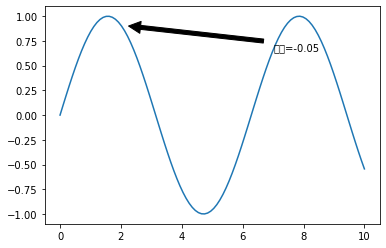

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成曲線圖數據
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 繪製曲線圖
plt.plot(x, y)

# 選擇兩個點
x1, y1 = 2, np.sin(2)
x2, y2 = 7, np.sin(7)

# 計算斜率
slope = (y2 - y1) / (x2 - x1)

# 繪製斜率標籤
plt.annotate("斜率={:.2f}".format(slope), xy=(x1, y1), xytext=(x2, y2),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

26
[[1677677818417.0, 1.0141597986221311], [1677677818549.0, 1.3889167308807373], [1677677820645.0, 1.0253907442092896], [1677677820771.0, 0.8145748376846313], [1677677823882.0, 0.751586377620697], [1677677824023.0, 0.9871825575828552], [1677677826719.0, 1.0748283863067627], [1677677826849.0, 0.8488776087760925], [1677677827317.0, 0.6634519100189209], [1677677827444.0, 1.018188238143921], [1677677829006.0, 0.810302197933197], [1677677829069.0, 1.0438227653503418], [1677677834003.0, 1.1909172534942627], [1677677834128.0, 0.8636468648910522], [1677677834604.0, 1.1944587230682373], [1677677834749.0, 0.9777829647064208], [1677677862526.0, 1.1156009435653689], [1677677862620.0, 0.8793947696685791], [1677677910870.0, 0.963379442691803], [1677677911019.0, 1.2622069120407104], [1677677917532.0, 1.1691898107528689], [1677677917665.0, 0.8845216631889343], [1677677924425.0, 1.5268560647964478], [1677677924534.0, 1.1705325841903689], [1677677945130.0, 1.28076171875], [1677677945169.0, 1.0787354707

Text(0, 0.5, 'Y Axis')

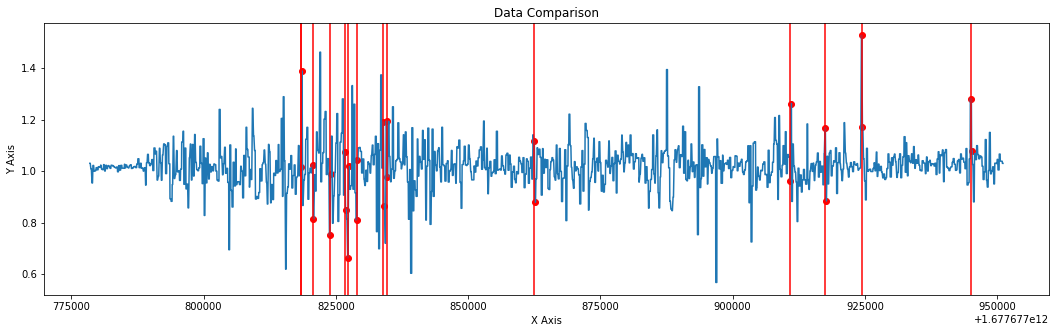

In [ ]:

cols = ['Timestamp', 'Amptitude']
# Plot Amptitude Graph
df_abnormal=pd.read_csv("/content/z_diff.txt")
print(df_abnormal.index.size)

# 創建一個圖表和一個軸
fig, ax = plt.subplots(figsize = (18,5))

# 畫第一個 DataFrame 的資料

ax.plot(r['Timestamp'], r['Amptitude'], label='Data 1')

# 畫第二個 DataFrame 的資料
ax.scatter(df_abnormal['Timestamp'], df_abnormal['Amptitude'],color = 'red', label='Data 2')
products_list = df_abnormal[cols].values.tolist()
print(products_list)
list_length=len(products_list)
print(products_list[0])
ax.axline(products_list[0],products_list[1],color='r')
for i in range(0, list_length, 2):
  ax.axline(products_list[i],products_list[i+1],color='r')
# 設置圖表標題和軸標籤
ax.set_title('Data Comparison')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
# tick_spacing = df_abnormal.index.size/3 # x軸密集度
# ax.xaxis.set_major_locator(mticker.MultipleLocator(50))
# 添加圖例
#ax.legend()

# 顯示圖表
#plt.show()


In [ ]:
######### Please Write Your Code Here #########
import numpy as np
def z_threshold(data,limit):
  mean = np.mean(data)
  std = np.std(data)
  print('mean of the dataset is', mean)
  print('std. deviation is', std)
  upperLimit=mean+limit*std
  lowerLimit=mean-limit*std
  print("Upper limit",upperLimit)
  print("Lower limit",lowerLimit)
  return upperLimit,lowerLimit
threshold=z_threshold(r["Amptitude"],3.1)
print("Upper limit:")
print(threshold[0])

r['verify'] = np.where(
    r["Accelerometer_z"]>1,
   np.where(
    r["Accelerometer_z"]>threshold[0],1,0)
   ,np.where(
    r["Accelerometer_z"]<threshold[1],1,0)
)
r2['verify'] = np.where(
    r2["Accelerometer_z"]>1,
   np.where(
    r2["Accelerometer_z"]>threshold[0],1,0)
   ,np.where(
    r2["Accelerometer_z"]<threshold[1],1,0)
)
r3['verify'] = np.where(
    r3["Accelerometer_z"]>1,
   np.where(
    r3["Accelerometer_z"]>threshold[0],1,0)
   ,np.where(
    r3["Accelerometer_z"]<threshold[1],1,0)
)
#print(r2.loc[r2['verify']==1,['Latitude','Longitude']])
GPS=r.loc[r['verify']==1,['Latitude','Longitude']]
GPS2=r2.loc[r2['verify']==1,['Latitude','Longitude']]
GPS3=r3.loc[r3['verify']==1,['Latitude','Longitude']]
GPS.to_csv(r'/content/data.txt',sep=',',index=False,header=0)
GPS2.to_csv(r'/content/data2.txt',sep=',',index=False,header=0)
GPS3.to_csv(r'/content/data3.txt',sep=',',index=False,header=0)

files = GPS.append(GPS2).append(GPS3) 
print(GPS.shape)
print(files.shape)

files.to_csv(r'/content/files.txt',sep=',',index=False,header=0)
#########

mean of the dataset is 1.0703029685617889
std. deviation is 0.1412509280818331
Upper limit 1.5081808456154715
Lower limit 0.6324250915081062
Upper limit:
1.5081808456154715
(12, 2)
(57, 2)


<ipython-input-10-5263f3d97d6a>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  files = GPS.append(GPS2).append(GPS3)
<ipython-input-10-5263f3d97d6a>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  files = GPS.append(GPS2).append(GPS3)


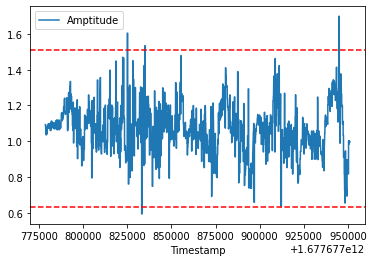

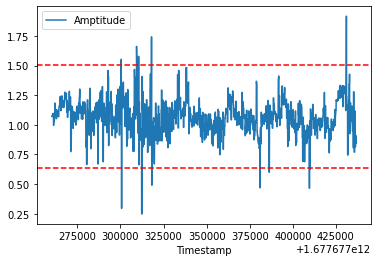

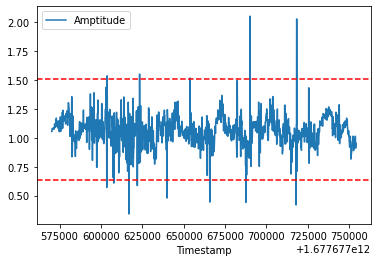

In [ ]:
# Plot Amptitude Graph
r.plot(x='Timestamp', y=['Amptitude'])
plt.axhline(y=threshold[0],ls='--',c='red')
plt.axhline(y=threshold[1],ls='--',c='red')
r2.plot(x='Timestamp', y=['Amptitude'])
plt.axhline(y=threshold[0],ls='--',c='red')
plt.axhline(y=threshold[1],ls='--',c='red')
r3.plot(x='Timestamp', y=['Amptitude'])
plt.axhline(y=threshold[0],ls='--',c='red')
plt.axhline(y=threshold[1],ls='--',c='red')

In [ ]:
# %cd /content/DENCLU/
# import sys
# sys.path.insert(1, '../lib')
# !git clone https://github.com/mgarrett57/DENCLUE.git
# %cd /content/DENCLU/DENCLUE
# import denclue

# print(data)
# cls_clust = denclue.DENCLUE(h=None, eps=0.005,min_density=None, metric='euclidean')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings
data = pd.read_csv('../../files.txt', header=None)
data.columns =['Feature_1','Feature_2']
def kernel_function(X, X_i, h):
    power = np.sqrt(np.square(X-X_i).sum())
    den = 2*h*h
    return np.square((0.399/h))*np.exp(-(power/den))
def gradient_ascent(new_feature, h):
    for i in range(10):
        new_values = [0, 0]
        sum_k = 0
        for j in range(data.shape[0]):
            k = kernel_function(new_feature, data.iloc[j][['Feature_1','Feature_2']].values, h)
            sum_k += k
            new_values += data.iloc[j][['Feature_1','Feature_2']].values*k
        new_feature = new_values/sum_k
    return np.round(new_feature,2)
def Denclue(data, h, t):
    data['height'] = 0.000
    data['new_F1'] = 0.000
    data['new_F2'] = 0.000
    no = 20
    for i in range(data.shape[0]):
        if no==i+1:
            print('*', end="")
            no+=20
        feat_1 = 0
        new_Feature = [0, 0]
        for j in range(data.shape[0]):
            k = kernel_function(data.iloc[i][['Feature_1','Feature_2']].values, data.iloc[j][['Feature_1','Feature_2']].values, h)
            feat_1 += k
            new_Feature += data.iloc[j][['Feature_1','Feature_2']].values*k
        data['height'][i] = (feat_1/len(data)-t)
        new_Feature /= feat_1
        if data['height'][i]<0:
            data['height'][i] = 0
        else:
            g = gradient_ascent(new_Feature, h)
            data['new_F1'][i] = g[0]
            data['new_F2'][i] = g[1]
    centers= pd.DataFrame({
        'F1_center': data[data['new_F1']!=0]['new_F1'].unique(),
        'F2_center': data[data['new_F2']!=0]['new_F2'].unique(),
        'Cluster': np.arange(1, len(data[data['new_F1']!=0]['new_F1'].unique())+1)
    })
    print('\n\nCluster Centers')
    print(centers)
    data['Cluster'] = -1
    for i in range(data.shape[0]):
        for j in range(centers.shape[0]):
            if data.iloc[i]['new_F1'] == centers.iloc[j]['F1_center'] and data.iloc[i]['new_F2'] == centers.iloc[j]['F2_center']:
                data['Cluster'][i] = centers.iloc[j]['Cluster']
                break
    print('\nNo of Datapoints in Each Cluster')
    print(data.groupby('Cluster')['Cluster'].count())
h = 0.5
t = 0.05
Denclue(data, h, t)
# data = pd.read_csv('../../files.txt', header=None)
# dc = DenClue(eps=0.5, min_density=0.05, xi=0.05, metric='euclidean')
# dc.fit(data)
# cls_clust.fit(data.fillna())
# cls_clust.get_density
#!get https://github.com/mgarrett57/DENCLUE/declue.py

**

Cluster Centers
   F1_center  F2_center  Cluster
0      24.79      121.0        1

No of Datapoints in Each Cluster
Cluster
1    57
Name: Cluster, dtype: int64


<ipython-input-74-f9b13c65e7a3>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'][i] = centers.iloc[j]['Cluster']


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

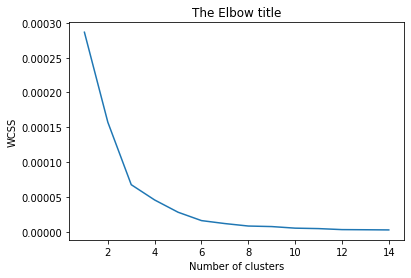

In [ ]:
from sklearn.cluster import KMeans
colnames=['x', 'y'] 
blobs = pd.read_csv('files.txt', names=colnames, header=None)
KM=KMeans(n_clusters=12,init='random',random_state=10)
KM.fit(blobs)
labels=KM.predict(blobs)

#plt.scatter(x=blobs['x'], y=blobs['y'], s=150,c=KM.predict(blobs))
centroids=KM.cluster_centers_#查看各群集的中心點
centroid_labels = [centroids[i] for i in labels]


# 將分組資料 (分類標籤) 併入原資料
lb = pd.DataFrame(labels, columns=['labels'])
df = pd.concat((lb, blobs), axis=1)
#print(df)
wcss=[]
for i in range(1,15):
  kmeans = KMeans(i,init='random',random_state=10)
  kmeans.fit(blobs)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,15)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
DF = pd.DataFrame(centroids)
DF.to_csv(r'/content/cluster.txt',sep=',',index=False,header=0)

<ipython-input-20-e2cbcf785a6d>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=blobs['x'], y=blobs['y'], s=150,


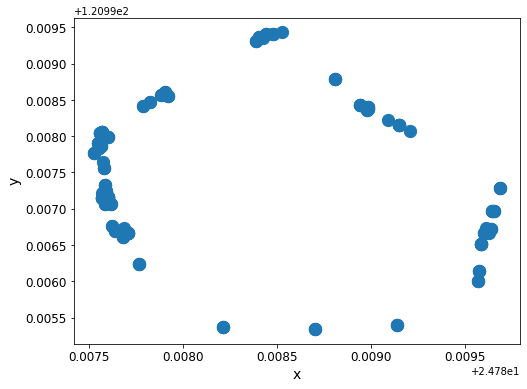

In [ ]:
from matplotlib.colors import ListedColormap
colnames=['x', 'y'] 
blobs = pd.read_csv('files.txt', names=colnames, header=None)
colnames = list(blobs.columns[1:-1])
blobs.head()
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['x'], y=blobs['y'], s=150, 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=5
df = blobs[['x','y']]
centroids = initiate_centroids(k, df)
centroids
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors. 
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2)) 
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 0.00
Error for centroid 1: 0.00
Error for centroid 2: 0.00
Error for centroid 3: 0.00
Error for centroid 4: 0.00


In [ ]:
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid. 
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

,x,y,centroid,error
0,24.787922,120.998560,1,3.120204e-18
1,24.787922,120.998560,1,3.120204e-18
2,24.787922,120.998560,1,3.120204e-18
3,24.787598,120.997995,2,7.948994e-14
4,24.787598,120.997995,2,7.948994e-14


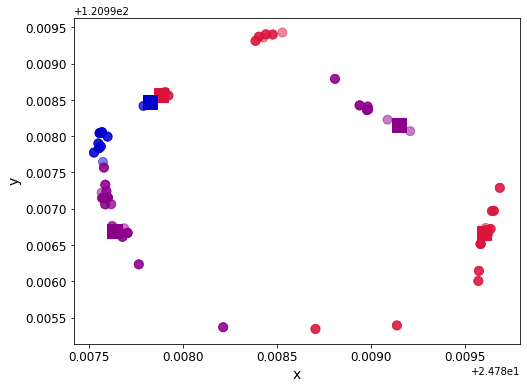

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0,1,2,3,4], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
print("The total error is {0:.2f}".format(df['error'].sum()))
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

The total error is 0.00


""
0
1
2
3
4


## Task3-畫GPS點至地圖上

In [ ]:
#下載地圖
!gdown --id 1_rUFNWCCFTu4YzFUEG2YVL1dARRiLCLK

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_rUFNWCCFTu4YzFUEG2YVL1dARRiLCLK
To: /content/map.jpg
100% 74.3k/74.3k [00:00<00:00, 55.8MB/s]


In [ ]:
class GPSVis(object):
    """
        Class for GPS data visualization using pre-downloaded OSM map in image format.
    """
    def __init__(self, data_path, map_path, points):
        """
        :param data_path: Path to file containing GPS records.
        :param map_path: Path to pre-downloaded OSM map in image format.
        :param points: Upper-left, and lower-right GPS points of the map (lat1, lon1, lat2, lon2).
        """
        self.data_path = data_path
        self.points = points
        self.map_path = map_path

        self.result_image = Image
        self.x_ticks = []
        self.y_ticks = []

    def plot_map(self, output='save', save_as='resultMap.png'):
        """
        Method for plotting the map. You can choose to save it in file or to plot it.
        :param output: Type 'plot' to show the map or 'save' to save it.
        :param save_as: Name and type of the resulting image.
        :return:
        """
        self.get_ticks()
        fig, axis1 = plt.subplots(figsize=(10, 10))
        axis1.imshow(self.result_image)
        axis1.set_xlabel('Longitude')
        axis1.set_ylabel('Latitude')
        axis1.set_xticklabels(self.x_ticks)
        axis1.set_yticklabels(self.y_ticks)
        axis1.grid()
        if output == 'save':
            plt.savefig(save_as)
        else:
            plt.show()

    def create_image(self, color, width=''):
        """
        Create the image that contains the original map and the GPS records.
        :param color: Color of the GPS records.
        :param width: Width of the drawn GPS records.
        :return:
        """
        data = pd.read_csv(self.data_path, names=['LATITUDE', 'LONGITUDE'], sep=',')
        # dataCluster = pd.read_csv('/content/cluster.txt', names=['LATITUDE', 'LONGITUDE'], sep=',')
        self.result_image = Image.open(self.map_path, 'r')
        img_points = []
        gps_data = tuple(zip(data['LATITUDE'].values, data['LONGITUDE'].values))
        # gps_data_cluster = tuple(zip(dataCluster['LATITUDE'].values, dataCluster['LONGITUDE'].values))
        draw = ImageDraw.Draw(self.result_image)
        axes =  (25, 55)
        for d in gps_data:
            x1, y1 = self.scale_to_img(d, (self.result_image.size[0], self.result_image.size[1]))
            draw.ellipse([(x1-2, y1-2),(x1+2, y1+2)], fill=color,width=width)
            #print(img_points)
        # for d in gps_data_cluster:
        #     x1, y1 = self.scale_to_img(d, (self.result_image.size[0], self.result_image.size[1]))
        #     draw.ellipse([(x1-10, y1-10),(x1+10, y1+10)], fill=(0,255,0),width=width,outline=(255,255,0))
        

    def scale_to_img(self, lat_lon, h_w):
        """
        Conversion from latitude and longitude to the image pixels.
        It is used for drawing the GPS records on the map image.
        :param lat_lon: GPS record to draw (lat1, lon1).
        :param h_w: Size of the map image (w, h).
        :return: Tuple containing x and y coordinates to draw on map image.
        """
        # https://gamedev.stackexchange.com/questions/33441/how-to-convert-a-number-from-one-min-max-set-to-another-min-max-set/33445
        old = (self.points[2], self.points[0])
        new = (0, h_w[1])
        y = ((lat_lon[0] - old[0]) * (new[1] - new[0]) / (old[1] - old[0])) + new[0]
        old = (self.points[1], self.points[3])
        new = (0, h_w[0])
        x = ((lat_lon[1] - old[0]) * (new[1] - new[0]) / (old[1] - old[0])) + new[0]
        # y must be reversed because the orientation of the image in the matplotlib.
        # image - (0, 0) in upper left corner; coordinate system - (0, 0) in lower left corner
        return x, h_w[1] - y

    def get_ticks(self):
        """
        Generates custom ticks based on the GPS coordinates of the map for the matplotlib output.
        :return:
        """
        self.x_ticks = np.round(
            np.linspace(self.points[1], self.points[3], num=7),
            4
        )
        y_ticks = np.round(
            np.linspace(self.points[2], self.points[0], num=8),
            4
        )
        # self.x_ticks = map(
        #     lambda x: round(x, 4),
        #     np.linspace(self.points[1], self.points[3], num=7))
        # y_ticks = map(
        #     lambda x: round(x, 4),
        #     np.linspace(self.points[2], self.points[0], num=8))
        # Ticks must be reversed because the orientation of the image in the matplotlib.
        # image - (0, 0) in upper left corner; coordinate system - (0, 0) in lower left corner
        self.y_ticks = sorted(y_ticks, reverse=True)


<ipython-input-20-988f0f3415a2>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis1.set_xticklabels(self.x_ticks)
<ipython-input-20-988f0f3415a2>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis1.set_yticklabels(self.y_ticks)


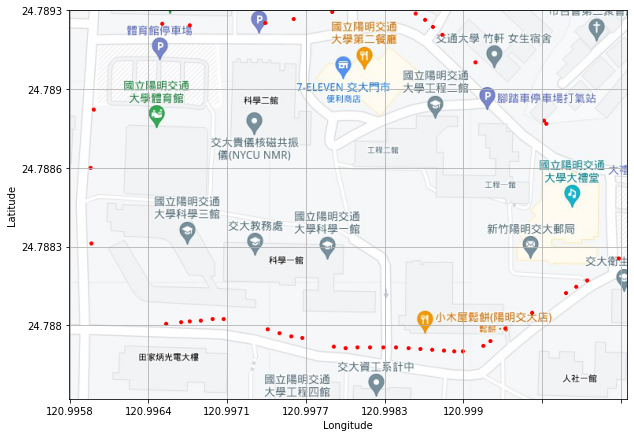

In [ ]:
#from gps_class import GPSVis

vis = GPSVis(data_path='/content/z_diff.txt',
             map_path='/content/map.jpg',  # Path to map downloaded from the OSM.
             points=(24.789664521572398, 120.99518219793899, 24.787270842564535, 120.99897215920797)) # Two coordinates of the map (upper left, lower right)


vis.create_image(color=(255, 0, 0), width=3)  # Set the color and the width of the GNSS tracks.
vis.plot_map(output='save')

print()


##Task4-叢集演算法

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

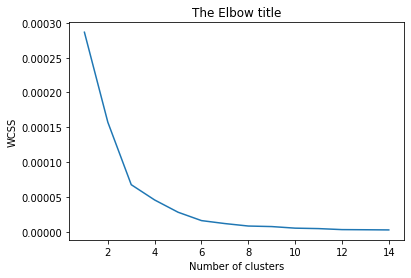

In [ ]:
from sklearn.cluster import KMeans
colnames=['x', 'y'] 
blobs = pd.read_csv('files.txt', names=colnames, header=None)
KM=KMeans(n_clusters=12,init='random',random_state=10)
KM.fit(blobs)
labels=KM.predict(blobs)

#plt.scatter(x=blobs['x'], y=blobs['y'], s=150,c=KM.predict(blobs))
centroids=KM.cluster_centers_#查看各群集的中心點
centroid_labels = [centroids[i] for i in labels]


# 將分組資料 (分類標籤) 併入原資料
lb = pd.DataFrame(labels, columns=['labels'])
df = pd.concat((lb, blobs), axis=1)
#print(df)
wcss=[]
for i in range(1,15):
  kmeans = KMeans(i,init='random',random_state=10)
  kmeans.fit(blobs)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,15)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
DF = pd.DataFrame(centroids)
DF.to_csv(r'/content/cluster.txt',sep=',',index=False,header=0)

<ipython-input-133-d3f73d7a0b8f>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis1.set_xticklabels(self.x_ticks)
<ipython-input-133-d3f73d7a0b8f>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis1.set_yticklabels(self.y_ticks)


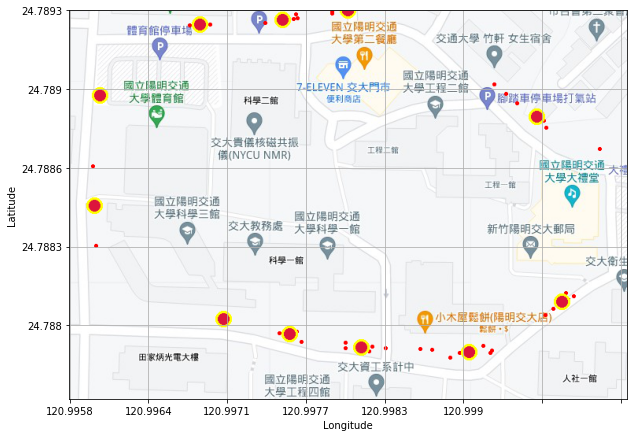

In [ ]:
#from gps_class import GPSVis

vis = GPSVis(data_path='/content/files.txt',
             map_path='/content/map.jpg',  # Path to map downloaded from the OSM.
             points=(24.789664521572398, 120.99518219793899, 24.787270842564535, 120.99897215920797)) # Two coordinates of the map (upper left, lower right)


vis.create_image(color=(255, 0, 0), width=3)  # Set the color and the width of the GNSS tracks.
vis.plot_map(output='save')

print()

In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster, datasets, metrics
from sklearn.neighbors import NearestCentroid
# plt.figure(figsize=(40, 7))  
# plt.title("Dendrograms")  
# dend = shc.dendrogram(shc.linkage(files, method='ward'))
# Hierarchical Clustering 演算法
hclust = AgglomerativeClustering(linkage = 'ward', metric = 'euclidean', n_clusters = 14)

# 印出分群結果
y_predict=hclust.fit(files)
cluster_labels = hclust.labels_

print(cluster_labels)
silhouette_avg = metrics.silhouette_score(files, cluster_labels)
print(silhouette_avg)
clf = NearestCentroid()
clf.fit(files, cluster_labels)
print(clf.centroids_)
DF = pd.DataFrame(clf.centroids_)
DF.to_csv(r'/content/cluster_hac.txt',sep=',',index=False,header=0)

[ 6  6  6 13 13 13  2  2  2  2  2  2  2  7  7  7  7  7  7  9  9  9  9  9
  9  9  9  9 12 12 12  8  8  8  4  4  4  4  4  4  3  3  3  0  0  0  5  5
  5  5  5  5  6  6  6  6  6  6  6  6 13 13 13 13 13  2  2  2  2  2  2  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  9  9  9  9  9  9  9  1  1  1
  4  4  4  4  4  4  4  3  3  3  3  3  3  0  0  0  5  5  5  5  5  5  5  5
 13 13 13 13 13 13  2  2  2  7  7  7  7  7  7  7  9  9  9  9 10 10 10  1
  1  1  8  8  8  4  4  4  4 11 11 11 11 11 11 11 11  0  0  0  0  0  0  0
  0  0  0]
0.7583859553665896
[[ 24.78893904 120.99846759]
 [ 24.78892135 120.99536765]
 [ 24.78755459 120.99777846]
 [ 24.7896618  120.99707647]
 [ 24.78960534 120.99663463]
 [ 24.78843394 120.99937626]
 [ 24.7878694  120.99853009]
 [ 24.78758771 120.99716652]
 [ 24.78957345 120.9960742 ]
 [ 24.78766999 120.99668238]
 [ 24.7882133  120.9953674 ]
 [ 24.78914912 120.99815087]
 [ 24.7877638  120.9962336 ]
 [ 24.78756911 120.99803683]]


<ipython-input-35-5f55ad85a56f>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis1.set_xticklabels(self.x_ticks)
<ipython-input-35-5f55ad85a56f>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis1.set_yticklabels(self.y_ticks)


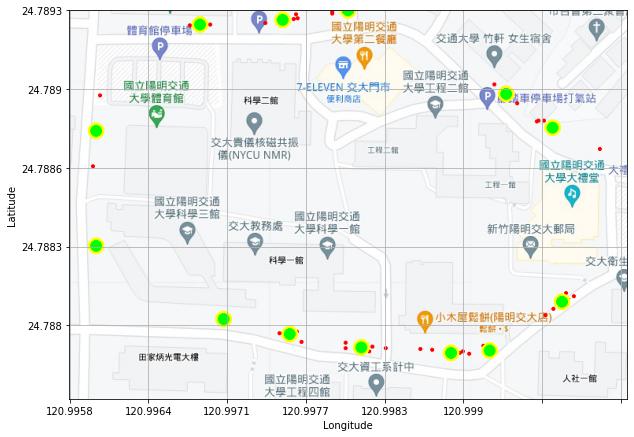

In [ ]:
#from gps_class import GPSVis

vis = GPSVis(data_path='/content/files.txt',
             map_path='/content/map.jpg',  # Path to map downloaded from the OSM.
             points=(24.789664521572398, 120.99518219793899, 24.787270842564535, 120.99897215920797)) # Two coordinates of the map (upper left, lower right)


vis.create_image(color=(255, 0, 0), width=3)  # Set the color and the width of the GNSS tracks.
vis.plot_map(output='save')

print()

In [ ]:
class GPSVis(object):
    """
        Class for GPS data visualization using pre-downloaded OSM map in image format.
    """
    def __init__(self, data_path, map_path, points):
        """
        :param data_path: Path to file containing GPS records.
        :param map_path: Path to pre-downloaded OSM map in image format.
        :param points: Upper-left, and lower-right GPS points of the map (lat1, lon1, lat2, lon2).
        """
        self.data_path = data_path
        self.points = points
        self.map_path = map_path

        self.result_image = Image
        self.x_ticks = []
        self.y_ticks = []

    def plot_map(self, output='save', save_as='resultMap.png'):
        """
        Method for plotting the map. You can choose to save it in file or to plot it.
        :param output: Type 'plot' to show the map or 'save' to save it.
        :param save_as: Name and type of the resulting image.
        :return:
        """
        self.get_ticks()
        fig, axis1 = plt.subplots(figsize=(10, 10))
        axis1.imshow(self.result_image)
        axis1.set_xlabel('Longitude')
        axis1.set_ylabel('Latitude')
        axis1.set_xticklabels(self.x_ticks)
        axis1.set_yticklabels(self.y_ticks)
        axis1.grid()
        if output == 'save':
            plt.savefig(save_as)
        else:
            plt.show()

    def create_image(self, color, width=''):
        """
        Create the image that contains the original map and the GPS records.
        :param color: Color of the GPS records.
        :param width: Width of the drawn GPS records.
        :return:
        """
        data = pd.read_csv(self.data_path, names=['LATITUDE', 'LONGITUDE'], sep=',')
        dataCluster = pd.read_csv('/content/cluster_hac.txt', names=['LATITUDE', 'LONGITUDE'], sep=',')
        self.result_image = Image.open(self.map_path, 'r')
        img_points = []
        gps_data = tuple(zip(data['LATITUDE'].values, data['LONGITUDE'].values))
        gps_data_cluster = tuple(zip(dataCluster['LATITUDE'].values, dataCluster['LONGITUDE'].values))
        draw = ImageDraw.Draw(self.result_image)
        axes =  (25, 55)
        for d in gps_data:
            x1, y1 = self.scale_to_img(d, (self.result_image.size[0], self.result_image.size[1]))
            draw.ellipse([(x1-2, y1-2),(x1+2, y1+2)], fill=color,width=width)
            #print(img_points)
        for d in gps_data_cluster:
            x1, y1 = self.scale_to_img(d, (self.result_image.size[0], self.result_image.size[1]))
            draw.ellipse([(x1-10, y1-10),(x1+10, y1+10)], fill=(0,255,0),width=width,outline=(255,255,0))
        

    def scale_to_img(self, lat_lon, h_w):
        """
        Conversion from latitude and longitude to the image pixels.
        It is used for drawing the GPS records on the map image.
        :param lat_lon: GPS record to draw (lat1, lon1).
        :param h_w: Size of the map image (w, h).
        :return: Tuple containing x and y coordinates to draw on map image.
        """
        # https://gamedev.stackexchange.com/questions/33441/how-to-convert-a-number-from-one-min-max-set-to-another-min-max-set/33445
        old = (self.points[2], self.points[0])
        new = (0, h_w[1])
        y = ((lat_lon[0] - old[0]) * (new[1] - new[0]) / (old[1] - old[0])) + new[0]
        old = (self.points[1], self.points[3])
        new = (0, h_w[0])
        x = ((lat_lon[1] - old[0]) * (new[1] - new[0]) / (old[1] - old[0])) + new[0]
        # y must be reversed because the orientation of the image in the matplotlib.
        # image - (0, 0) in upper left corner; coordinate system - (0, 0) in lower left corner
        return x, h_w[1] - y

    def get_ticks(self):
        """
        Generates custom ticks based on the GPS coordinates of the map for the matplotlib output.
        :return:
        """
        self.x_ticks = np.round(
            np.linspace(self.points[1], self.points[3], num=7),
            4
        )
        y_ticks = np.round(
            np.linspace(self.points[2], self.points[0], num=8),
            4
        )
        # self.x_ticks = map(
        #     lambda x: round(x, 4),
        #     np.linspace(self.points[1], self.points[3], num=7))
        # y_ticks = map(
        #     lambda x: round(x, 4),
        #     np.linspace(self.points[2], self.points[0], num=8))
        # Ticks must be reversed because the orientation of the image in the matplotlib.
        # image - (0, 0) in upper left corner; coordinate system - (0, 0) in lower left corner
        self.y_ticks = sorted(y_ticks, reverse=True)
